# ***Data Preprocessing of MTS-Dialogue Training Dataset***

In [6]:
#importing libs
import pandas as pd
from datasets import Dataset
from transformers import BartTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [7]:
def explore_and_prepare_dataset(file_path, output_file_path):
    pd.set_option('display.max_columns',None)
    #loding the file..
    try:
        df = pd.read_csv(file_path)
        print(f"Dataset is loaded successfully. shape :- {df.shape}")
    except FileNotFoundError:
        print(f"file is not found at {file_path}")
        return 
        
    #preparing data for conditional generation..
    #goal:- to transform the dataframe into a format suitable for a conditoinal generation model. we need to create two columns:
    #1. input_text:- this will be the text fed into the modle.. it will contain both the section header and the dialogue.
    #2. target_text:- this will be ground-truth summary the model learns to generate.

    df['input_text'] = "summarize for section:- " + df['section_header'] + " | dialogue:- " + df['dialogue']
    df['target_text'] = df['section_text']

    #creating the new dataset with the columns which is required for the model
    df_train = df[['input_text', 'target_text']].copy()

    print("\nFirst 5 rows of model-ready data:- ")
    display(df_train)

    print("example of a single training instance....")
    print(f"\n[INPUT TEXT]:\n{df_train['input_text'].iloc[0]}")
    print(f"\n[TARGET TEXT]:\n{df_train['target_text'].iloc[0]}")

    #analyze text lengths
    #to calculate and visualize the word count distributions
    #calculating word counts...
    df_train['input_word_count'] = df_train['input_text'].str.split().str.len()
    df_train['target_word_count'] = df_train['target_text'].str.split().str.len()
    #display descriptive statistics..
    print('word count stats...')
    display(df_train[['input_word_count','target_word_count']].describe())
    #visualize the distribuation...
    sns.set_style('whitegrid')
    plt.figure(figsize=(14,6))
    ##plot for input text length
    plt.subplot(1,2,1)
    sns.histplot(df_train['input_word_count'], bins=50,color='royalblue',kde=True)
    plt.title('Distributaion of input text lengths (words)')
    plt.xlabel('word count')
    plt.ylabel('frequency')
    ##plo for target text length
    plt.subplot(1,2,2)
    sns.histplot(df_train['target_word_count'],bins=30,color='seagreen',kde=True)
    plt.title('Distribution of target text length (words)')
    plt.xlabel('word count')
    plt.ylabel('frequency')
    plt.tight_layout()
    plt.show()

    output_dir = os.path.dirname(output_file_path)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    df_train.to_csv(output_file_path, index=False)

Dataset is loaded successfully. shape :- (1201, 4)

First 5 rows of model-ready data:- 


,input_text,target_text
0,summarize for section:- GENHX | dialogue:- Doc...,The patient is a 76-year-old white female who ...
1,summarize for section:- GENHX | dialogue:- Doc...,The patient is a 25-year-old right-handed Cauc...
2,summarize for section:- GENHX | dialogue:- Doc...,"This is a 22-year-old female, who presented to..."
3,summarize for section:- MEDICATIONS | dialogue...,Prescribed medications were Salmeterol inhaler...
4,summarize for section:- CC | dialogue:- Doctor...,"Burn, right arm."
...,...,...
1196,summarize for section:- PASTSURGICAL | dialogu...,Vasectomy.
1197,summarize for section:- MEDICATIONS | dialogue...,"Tylenol #3 q6h prn, ibuprofen 800 mg q8h prn, ..."
1198,summarize for section:- GENHX | dialogue:- Doc...,This patient presents to the office today for ...
1199,summarize for section:- FAM/SOCHX | dialogue:-...,"No tobacco, alcohol or illicit drug use. Patie..."


example of a single training instance....

[INPUT TEXT]:
summarize for section:- GENHX | dialogue:- Doctor: What brings you back into the clinic today, miss? 
Patient: I came in for a refill of my blood pressure medicine. 
Doctor: It looks like Doctor Kumar followed up with you last time regarding your hypertension, osteoarthritis, osteoporosis, hypothyroidism, allergic rhinitis and kidney stones.  Have you noticed any changes or do you have any concerns regarding these issues?  
Patient: No. 
Doctor: Have you had any fever or chills, cough, congestion, nausea, vomiting, chest pain, chest pressure?
Patient: No.  
Doctor: Great. Also, for our records, how old are you and what race do you identify yourself as?
Patient: I am seventy six years old and identify as a white female.

[TARGET TEXT]:
The patient is a 76-year-old white female who presents to the clinic today originally for hypertension and a med check.  She has a history of hypertension, osteoarthritis, osteoporosis, hypothyroidi

,input_word_count,target_word_count
count,1201.000000,1201.000000
mean,111.691091,40.575354
std,117.638388,66.951583
min,12.000000,1.000000
25%,40.000000,5.000000
50%,70.000000,14.000000
75%,139.000000,45.000000
max,1515.000000,1020.000000


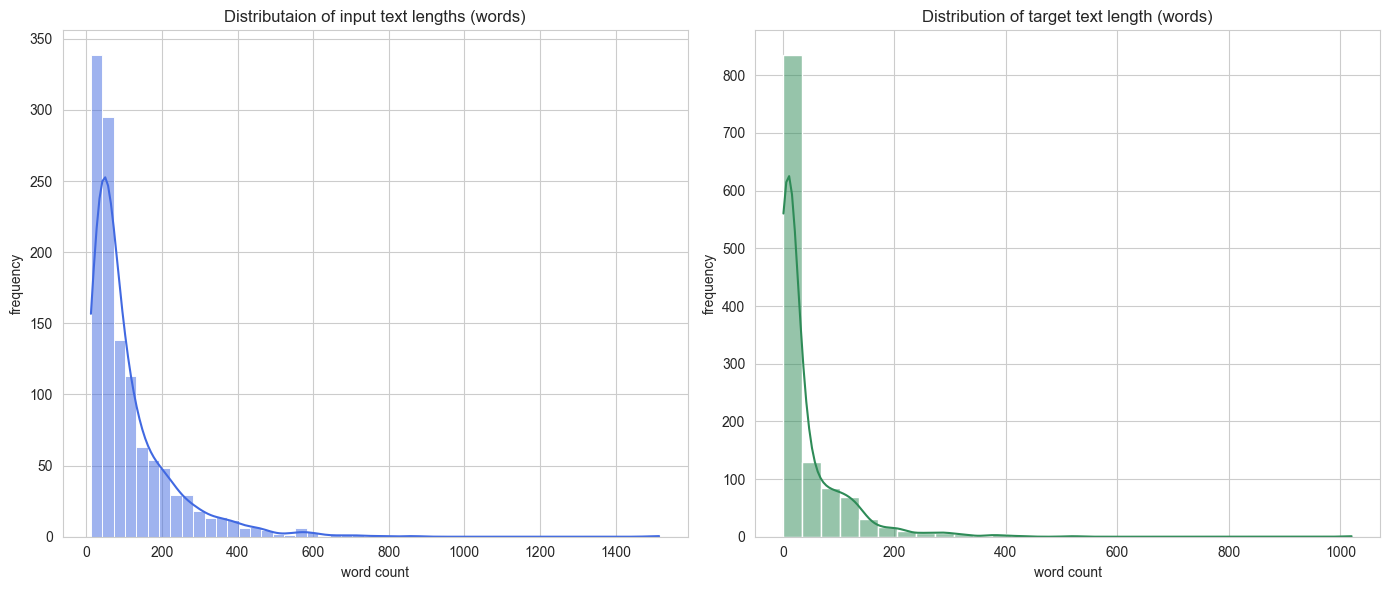

Dataset is loaded successfully. shape :- (100, 4)

First 5 rows of model-ready data:- 


,input_text,target_text
0,summarize for section:- GENHX | dialogue:- Doc...,"The patient is a 26-year-old female, referred ..."
1,summarize for section:- ROS | dialogue:- Docto...,As mentioned denies any oropharyngeal swelling...
2,summarize for section:- PASTMEDICALHX | dialog...,Essentially unchanged from her visit of 04/15/...
3,summarize for section:- MEDICATIONS | dialogue...,Accutane.
4,summarize for section:- CC | dialogue:- Doctor...,Confusion and hallucinations.
...,...,...
95,summarize for section:- PROCEDURES | dialogue:...,Permanent pacemaker placement after temporary ...
96,summarize for section:- ROS | dialogue:- Docto...,The patient prior to today has been very well ...
97,summarize for section:- IMAGING | dialogue:- D...,"EKG shows sinus tachycardia, no acute ST changes."
98,summarize for section:- IMMUNIZATIONS | dialog...,Up-to-date.


example of a single training instance....

[INPUT TEXT]:
summarize for section:- GENHX | dialogue:- Doctor: When did your pain begin? 
Patient: I've had low back pain for about eight years now.
Doctor: Is there any injury? 
 Patient: Yeah, it started when I fell in an A B C store.
Doctor: How old are you now?
Patient: I'm twenty six.  
Doctor: What kind of treatments have you had for this low back pain? 
Patient: Yeah, I got referred to P T, and I went, but only once or twice, um, and if I remember right, they only did the electrical stimulation, and heat. 
Doctor: I see, how has your pain progressed over the last eight years? 
Patient: It's been pretty continuous, but it's been at varying degrees, sometimes are better than others. 
Doctor: Do you have any children? 
Patient: Yes, I had my son in August of two thousand eight, and I've had back pain since giving birth. 
Doctor: Have you had any falls since the initial one? 
Patient: Yes, I fell four or five days ago while I was mopping 

,input_word_count,target_word_count
count,100.000000,100.000000
mean,95.980000,36.080000
std,97.692982,51.281493
min,12.000000,1.000000
25%,33.000000,5.000000
50%,60.500000,15.000000
75%,119.250000,43.500000
max,636.000000,295.000000


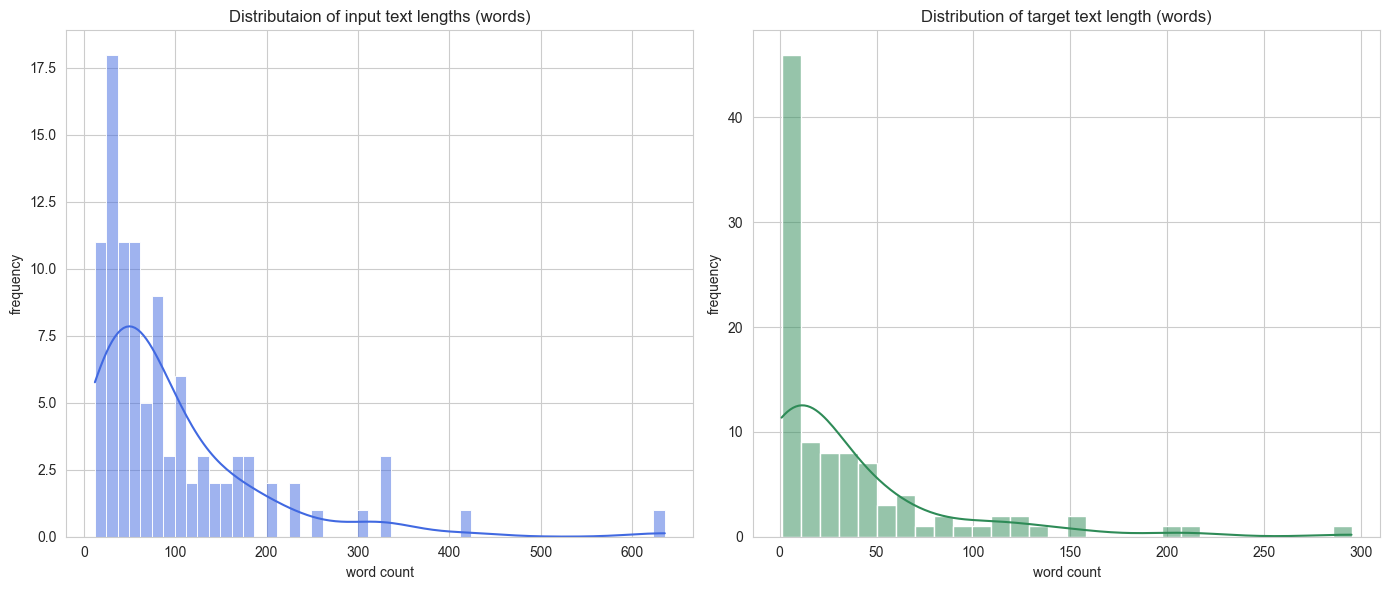

Dataset is loaded successfully. shape :- (200, 4)

First 5 rows of model-ready data:- 


,input_text,target_text
0,summarize for section:- GENHX | dialogue:- Doc...,The patient is a 55-year-old African-American ...
1,summarize for section:- FAM/SOCHX | dialogue:-...,Positive for stroke and sleep apnea.
2,summarize for section:- ROS | dialogue:- Docto...,"MSK: Negative myalgia, negative joint pain, ne..."
3,summarize for section:- FAM/SOCHX | dialogue:-...,Noncontributory.
4,summarize for section:- FAM/SOCHX | dialogue:-...,"Father died of a thoracic aortic aneurysm, age..."
...,...,...
195,summarize for section:- GENHX | dialogue:- Doc...,"Briefly, the patient is a very pleasant 72-yea..."
196,summarize for section:- ROS | dialogue:- Docto...,"NOSE AND THROAT: Negative postnasal drip, nega..."
197,summarize for section:- GENHX | dialogue:- Doc...,The patient is alert and oriented x3 and sitti...
198,summarize for section:- PASTMEDICALHX | dialog...,Past medical history is unremarkable.


example of a single training instance....

[INPUT TEXT]:
summarize for section:- GENHX | dialogue:- Doctor: Good afternoon, sir. Did you just have a birthday? I don't have my chart with me right now, the nurse is bringing it. 
Patient: Good afternoon, sir. Yes, I just turned fifty five. 
Doctor: You identify as African American, correct? 
Patient: Yes, that's right. 
Doctor: When was your last visit, sir? 
Patient: Um, it was on July twenty ninth two thousand eight. 
Doctor: Yes, I see. Did we go over your M R I results? 
Patient: No, I was having those new seizures, remember?
Doctor: Yes, I do. Well, the M R I demonstrated right contrast temporal mass. 
Patient: What exactly does that mean, doctor? 
Doctor: Well, given this mass, and your new seizures, I am concerned that this could be a high grade glioma, we'll need to do more tests.

[TARGET TEXT]:
The patient is a 55-year-old African-American male that was last seen in clinic on 07/29/2008 with diagnosis of new onset seizures and a

,input_word_count,target_word_count
count,200.000000,200.000000
mean,106.085000,38.460000
std,97.287523,56.631387
min,14.000000,1.000000
25%,42.750000,6.000000
50%,72.500000,14.000000
75%,124.250000,46.250000
max,614.000000,403.000000


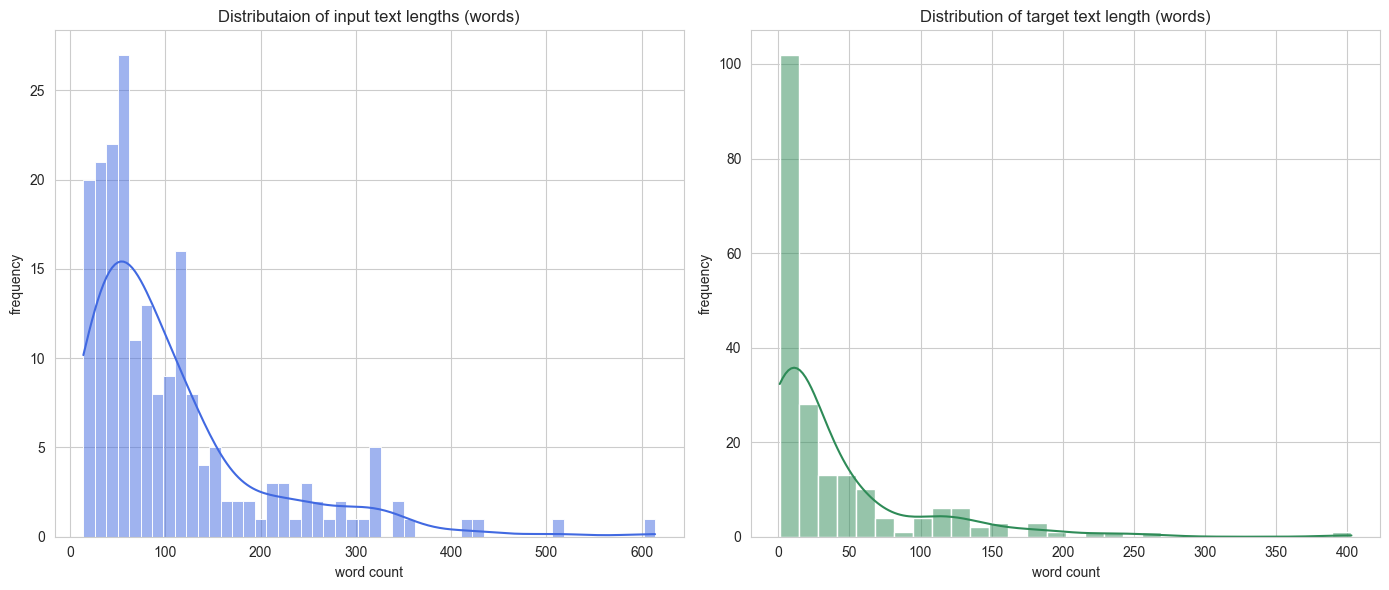

In [8]:
train_path = '../data/MTS-Dialog-TrainingSet.csv'
validation_path = '../data/MTS-Dialog-ValidationSet.csv'
test_path = '../data/MTS-Dialog-TestSet.csv'

processed_train_path = '../data/processed/train_processed.csv'
processed_validation_path = '../data/processed/validation_processed.csv'
processed_test_path = '../data/processed/test_processed.csv'

explore_and_prepare_dataset(train_path, processed_train_path)
explore_and_prepare_dataset(validation_path, processed_validation_path)
explore_and_prepare_dataset(test_path, processed_test_path)